In [1]:
from netCDF4 import Dataset, date2num, num2date
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mplticker
import matplotlib.colors as colors
import cartopy.crs as ccrs
from mpl_toolkits.axes_grid1 import make_axes_locatable

import matplotlib.dates as mdates
import string
import datetime as dt
import cftime as cf

from scipy import stats

%matplotlib inline

In [2]:
slopeDS = Dataset('/scratch/srai6/EddyKillingPaper3/QuikSCAT/100kmResults/slopeAndCorr2D_0100km.nc')
slope = np.array(slopeDS.variables['slope'][:,:])

GridFile = '/scratch/srai6/EddyKillingPaper3/QuikSCAT/GlobalGrid_latlon.nc'
gridDS = Dataset(GridFile)
UAREA = np.array(gridDS.variables['UAREA'])
# UAREAwTax = np.array(378*[UAREA])
KMT = np.array(gridDS.variables['KMT'])
#landMask =  np.isnan(NLmodel2Order)
# landMaskWtimeAx = np.array(378*[landMask])


#slope = 1
ds_modl_avg = Dataset('/scratch/srai6/EddyKillingPaper3/QuikSCAT/100kmResults/tavg_NLmodelEP_0100km.nc')
ds_orig_avg = Dataset('/scratch/srai6/EddyKillingPaper3/QuikSCAT/100kmResults/tavgFiltered_0100.nc')

EPPAavg = np.array(ds_orig_avg.variables['EddyPowerPerArea'][0,:,:], dtype=float) 
NLmodelavg = np.array(ds_modl_avg.variables['NLmodel_EPCg'][0,:,:], dtype=float) 
NLmodel2Order_avg = np.array(ds_modl_avg.variables['NLmodel2_EPCg'][0,:,:], dtype=float)
NLmodel_rot_avg = np.array(ds_modl_avg.variables['NLmodel_EPCg_rot'][0,:,:], dtype=float)  
NLmodel_str_avg = np.array(ds_modl_avg.variables['NLmodel_EPCg_strain'][0,:,:], dtype=float)

landMask =  np.isnan(NLmodel2Order_avg)

EPPAavg[landMask] =float('nan')
NLmodelavg[landMask] = float('nan')
NLmodel2Order_avg[landMask] = float('nan')
NLmodel_rot_avg[landMask] = float('nan')
NLmodel_str_avg[landMask] = float('nan')

print('{0:6.2f} GW'.format(np.nansum(EPPAavg * UAREA)/1e9))
print('{0:6.2f} GW'.format(np.nansum(NLmodelavg * UAREA)/1e9))
print('{0:6.2f} GW'.format(np.nansum(NLmodel2Order_avg * UAREA)/1e9))
print('{0:6.2f} GW'.format(np.nansum(NLmodel_rot_avg * UAREA)/1e9))
print('{0:6.2f} GW'.format(np.nansum(NLmodel_str_avg * UAREA)/1e9))

slope = np.nansum(EPPAavg * UAREA)/np.nansum((NLmodelavg)* UAREA)

-33.02 GW
-11.48 GW
 -1.48 GW
 -5.74 GW
 -5.75 GW


In [3]:
print(slope)
slope = 1/slope

2.8753737080838127


In [22]:
#slope=1
ds_orig = Dataset('/scratch/srai6/EddyKillingPaper3/QuikSCAT/100kmResults/11.nc_100._Filtered.nc')
ds_modl = Dataset('/scratch/srai6/EddyKillingPaper3/QuikSCAT/100kmResults/NLmodelEP_100km_day11.nc')
ds_masks = Dataset('/scratch/srai6/EddyKillingPaper3/QuikSCAT/RegionMasks.nc')

EPPA = np.array(ds_orig.variables['EddyPowerPerArea'][0,:,:])
NLmodel = np.array(ds_modl.variables['NLmodel_EPCg'][0,:,:])/slope
NLmodel2Order = np.array(ds_modl.variables['NLmodel2_EPCg'][0,:,:])/slope
NLmodel_rot = np.array(ds_modl.variables['NLmodel_EPCg_rot'][0,:,:])/slope
NLmodel_strain = np.array(ds_modl.variables['NLmodel_EPCg_strain'][0,:,:])/slope

GridFile = '/scratch/srai6/EddyKillingPaper3/QuikSCAT/GlobalGrid_latlon.nc'
gridDS = Dataset(GridFile)
UAREA = np.array(gridDS.variables['UAREA'])
# UAREAwTax = np.array(378*[UAREA])
KMT = np.array(gridDS.variables['KMT'])
landMask =  np.isnan(NLmodel2Order)
# landMaskWtimeAx = np.array(378*[landMask])

In [23]:
np.shape(EPPA), np.shape(NLmodel), np.shape(NLmodel_rot), np.shape(NLmodel_strain), np.shape(landMask)

((720, 1440), (720, 1440), (720, 1440), (720, 1440), (720, 1440))

In [24]:
EPPA[landMask] = float('nan')
NLmodel[landMask] = float('nan')
NLmodel2Order[landMask] = float('nan')

In [25]:
#slope = 1
ds_modl_avg = Dataset('/scratch/srai6/EddyKillingPaper3/QuikSCAT/100kmResults/tavg_NLmodelEP_0100km.nc')
ds_orig_avg = Dataset('/scratch/srai6/EddyKillingPaper3/QuikSCAT/100kmResults/tavgFiltered_0100.nc')

EPPAavg = np.array(ds_orig_avg.variables['EddyPowerPerArea'][0,:,:], dtype=float) 
NLmodelavg = np.array(ds_modl_avg.variables['NLmodel_EPCg'][0,:,:], dtype=float) /slope
NLmodel2Order_avg = np.array(ds_modl_avg.variables['NLmodel2_EPCg'][0,:,:], dtype=float)/slope
NLmodel_rot_avg = np.array(ds_modl_avg.variables['NLmodel_EPCg_rot'][0,:,:], dtype=float)  /slope
NLmodel_str_avg = np.array(ds_modl_avg.variables['NLmodel_EPCg_strain'][0,:,:], dtype=float)/slope

EPPAavg[landMask] =float('nan')
NLmodelavg[landMask] = float('nan')
NLmodel2Order_avg[landMask] = float('nan')
NLmodel_rot_avg[landMask] = float('nan')
NLmodel_str_avg[landMask] = float('nan')

print('{0:6.2f} GW'.format(np.nansum(EPPAavg * UAREA)/1e9))
print('{0:6.2f} GW'.format(np.nansum(NLmodelavg * UAREA)/1e9))
print('{0:6.2f} GW'.format(np.nansum(NLmodel2Order_avg * UAREA)/1e9))
print('{0:6.2f} GW'.format(np.nansum(NLmodel_rot_avg * UAREA)/1e9))
print('{0:6.2f} GW'.format(np.nansum(NLmodel_str_avg * UAREA)/1e9))

-33.02 GW
-29.25 GW
 -3.77 GW
-14.62 GW
-14.63 GW


In [26]:
# lon = np.array(ds_modl.variables['longitude'])
# lat = np.array(ds_modl.variables['latitude'])
# np.shape(lon), np.shape(lat)
# mask_tropics = abs(lat) < 25.0
lon = np.arange(0.125,360,0.25)
lat = np.arange(-89.875,90,0.25)

lon[lon>180] -= 360
lon = np.roll(lon, 720)
print(len(lon), len(lat), lon[720], lon[0], lon[len(lon)-1])

1440 720 0.125 -179.875 179.875


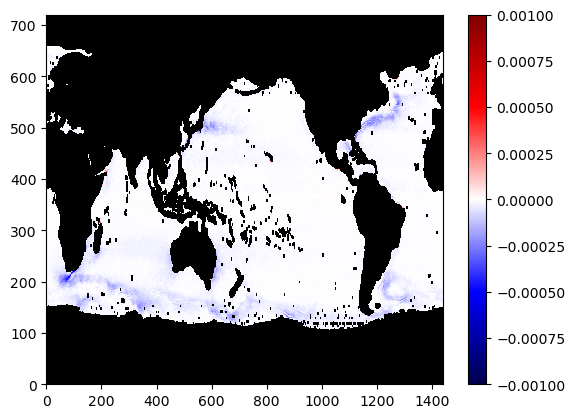

In [27]:
v = 1e-3
cmap=plt.get_cmap('seismic').copy()
cmap.set_bad('k')
plt.pcolormesh(NLmodel2Order_avg, cmap=cmap, vmin=-v, vmax=v)
plt.colorbar()

In [28]:
#ds_corr_all = Dataset("/scratch/srai6/EddyKillingPaper3/QuikSCAT/timeSpaceFlattenCorr.nc")
ds_corr_2D = Dataset("/scratch/srai6/EddyKillingPaper3/QuikSCAT/100kmResults/Corr2D_allEll.nc")

ell = np.array(ds_corr_2D.variables['ell'])
ellIDX = np.where(ell == 100)[0][0]

# region = np.array(ds_corr_all.variables['region'])
# regionIDX = np.where(region == 'Global')[0][0]
# r_EPPA_NLMtot = np.array(ds_corr_all.variables['corr_EPPA_NLMtot'][:,regionIDX]) 
# r_tAvg_EPPA_NLMtot = np.array(ds_corr_all.variables['corr_tAvg_EPPA_NLMtot'][:,regionIDX]) # (ell, region)

rNLM_tot = np.array(ds_corr_2D.variables['rNLM_tot'][ellIDX,:,:])
rNLM_tot[landMask] = float('nan')


In [29]:
fldLoc = '/scratch/srai6/EddyKillingPaper3/QuikSCAT/100kmResults/'
origFile = 'regionalAllEllTimeSeries_TDT_MPPA_EPPA_QS.nc'
modelFile = 'allEllallRegionsEP_ModelRotAndStrComp_2.nc'
orig_ds = Dataset(fldLoc + origFile)
modl_ds = Dataset(fldLoc + modelFile)

# ds_a = Dataset(fldLoc + "timeSpaceFlattenCorr.nc")
# ds_b = Dataset(fldLoc + "Corr2D_allEll.nc")



regions = np.array(modl_ds.variables['region'])
nregions = len(regions)
ell = np.array(modl_ds.variables['ell'])
nell = len(ell)
ndays = 378

EPPA_TS = np.zeros((nell, nregions, ndays), dtype=float)
NLM_totPA_TS = np.array(modl_ds.variables['NLM_tot_PerArea'])/slope
NLM2_totPA_TS = np.array(modl_ds.variables['NLM2Order_tot_PerArea'])/slope
NLM_rotPA_TS = np.array(modl_ds.variables['NLM_rot_PerArea'])/slope
NLM_strPA_TS = np.array(modl_ds.variables['NLM_str_PerArea'])/slope

EPPA_ell = np.array(orig_ds.variables['ell'])
EPPA_100kmIndx = np.where(EPPA_ell == 100)[0][0]
for i in range(nregions-2):
    varName = 'EPPA_' + regions[i]
    EPPA_TS[:,i,:] = np.array(orig_ds.variables[varName])[EPPA_100kmIndx,:]
    


In [30]:
dateUnits = 'days since 1999-10-01 00:00:00'

ndays = 378

cfdates = num2date(7 * (np.arange(ndays) + 1) - 4, dateUnits)
strdates = ['{0:02d}/{1:02d}/{2:04d}'.format(d.month, d.day, d.year) for d in cfdates]
dates = [dt.datetime.strptime(d, '%m/%d/%Y').date() for d in strdates]

years = mdates.YearLocator()   # every year
#months = mdates.MonthLocator(interval =4)  # every 4 month
months = mdates.MonthLocator(bymonth = (4,7,10))
#months = mdates.MonthLocator()  # every month
years_fmt = mdates.DateFormatter('%Y')
months_fmt = mdates.DateFormatter('%b')

date_fmt = mdates.DateFormatter('%b %Y')


PlotTitle = {'Gulf': 'Gulf Stream',
             'Kuroshio': 'Kuroshio Extension',
             'BrazilACC': 'Brazil Malvinas',
             'Agulhas': 'Agulhas',
             'ACC': 'ACC',
             'Equator': 'Equator',
             'SouthernOcean': 'Southern Ocean',
             'Global': 'Global'}





def plot_Trend(ellList, all_EP, all_NLM_tot, plt_labels, regions, regionName, ax, showXticks=True):
    #print('all_EP shape', np.shape(all_EP))
    #print('all_NLM_tot shape', np.shape(all_NLM_tot))
    
    regIdx = np.where(regions == regionName)[0][0]
    
    #print('region index', regIdx)
    
    EP = (all_EP[:,regIdx,:]).copy()
    NLM_tot = (all_NLM_tot[:,regIdx,:]).copy()
    #print('NLM_tot', np.shape(NLM_tot))
    
    avg_EP = np.mean(EP, axis = 1)
    avg_NLM_tot = np.mean(NLM_tot, axis = 1)
    
    print(np.shape(avg_NLM_tot))
    #ellIdx = np.argmin(avg_NLM_tot)
    ellIdx = np.where(ellList == 100)[0][0]
    #ellIdx = np.argmax(corr_EPPA_NLMtot[:,regIdx])
    
    #print('ell index', ellIdx)
    
    ell = ellList[ellIdx]
    
    EP = all_EP[ellIdx, regIdx,:].copy()
    NLM_tot = all_NLM_tot[ellIdx, regIdx,:].copy()
    
    ndays = len(EP)
    
    plt_runAvg_EP = np.ones((ndays), dtype =float) * float('nan')
    plt_runAvg_NLM = np.ones((ndays), dtype =float) * float('nan')
    
    ksize = 13
    half_ksize = ksize//2
    kernel = np.ones((ksize,), dtype=float)/ksize

    runAvg_EP = np.convolve(EP, kernel, mode='valid')
    runAvg_NLM = np.convolve(NLM_tot, kernel, mode='valid')
    
    lastindx = half_ksize+len(runAvg_EP)
                         
    plt_runAvg_EP[half_ksize:lastindx] = runAvg_EP
    plt_runAvg_NLM[half_ksize:lastindx] = runAvg_NLM
    
    coeffs= np.corrcoef(runAvg_EP, runAvg_NLM)[0, 1]
        
    slope1, intercept1, r_value1, p_value1, std_err1 = stats.linregress( runAvg_EP, runAvg_NLM )
    stdev_EP = np.std(runAvg_EP)
    stdev_NLM = np.std(runAvg_NLM)
    
    prob = 0.95
    Npoints = ndays - 2*half_ksize
    t_star = stats.t.cdf( 1 - (1-prob)/2, Npoints - 1 )
    
    std_err1 *=t_star *stdev_EP/stdev_NLM 
    #std_err2 *=t_star *stdev_NLM/stdev_NLM

    txt1 = r'r={0:>5.2f}$\pm${1:>4.2f}'.format(
            coeffs, 
            #slope1, 
            std_err1)
    
    txt3= r'{0:s}, $\ell$ = {1:d} km '.format(PlotTitle[regionName], ell)
    #txt3 = '{1:>{0}}'.format(len(region), txt3_dummy)
    txt = txt3 + '\n' + txt1 #+ '\n' + txt3 + txt2
        
    ax.plot(dates, EP, color='steelblue', alpha=0.4,rasterized = True)
    ax.plot(dates, NLM_tot, color='tomato', alpha=0.4,rasterized = True)
    

    ax.plot(dates, plt_runAvg_EP, color='steelblue', linewidth=2,rasterized = True, label=plt_labels[0])
    ax.plot(dates, plt_runAvg_NLM, color='tomato', linewidth=2,rasterized = True, label=plt_labels[1])

    #ax.axhline(linewidth=0.5, color='k',rasterized = True)#plot(dates, zero_line, linestyle=':', color='black')

    maxy = max(np.nanmax(plt_runAvg_NLM), np.nanmax(plt_runAvg_EP))
    miny = min(np.nanmin(plt_runAvg_NLM), np.nanmin(plt_runAvg_EP))
    
    diffy = maxy-miny

    ax.set_ylim([miny - 0.08 * diffy, (maxy + 0.40 * diffy)])

    ax.grid(visible=True, which='major', axis='both', linewidth=0.5, alpha = 0.5)
    ax.grid(visible=True, which='minor', axis='x', linewidth=0.1, alpha=0.2)
    
    
    ax.xaxis.set_major_locator(years)
    ax.xaxis.set_major_formatter(date_fmt)
    
    plt.setp(ax.yaxis.get_majorticklabels(), size=15)
    plt.setp(ax.xaxis.get_majorticklabels(), rotation=60, size=15)
    
    if showXticks==False:
        plt.setp(ax.get_xticklabels(), visible=False)
    
    
    ax.text(0.12, 0.70, txt, horizontalalignment='left', fontweight = 'light', 
                    verticalalignment='bottom', transform=ax.transAxes, fontsize=17)


In [31]:
def plot2D_clim(plotMat, X, Y, 
                textInFig, 
                lim, 
                cbUnits, 
                ax, figLabel, 
                figLabelColor = 'white', 
                textInFigColor = 'white',
                cmapName='seismic',
                greaterThan = 'True',
                lessThan = 'True',
                dx = False,
                writeColorBar = False,
                returnPlot = False,
                projection = True,
                outCont = True):
    
    minval = np.nanmin(plotMat)
    maxval = np.nanmax(plotMat)

    print(minval)
    print(maxval)

    if abs(minval) < maxval:
        val = abs(minval) * 0.1
    else:
        val = abs(maxval) * 0.1
        
    cmap = plt.get_cmap(cmapName).copy()
    levels = 200
    level_boundaries = np.linspace(-lim, lim, levels + 1)
    
    extd = 'neither'
    if greaterThan and lessThan:
        extd = 'both'
    elif greaterThan:
            extd = 'min'
    elif lessThan:
            extd = 'max'
            
    
    if outCont:
        pmesh = ax.contourf(X, Y, plotMat, level_boundaries, #norm=colors.CenteredNorm(),
                            cmap=cmap, extend=extd,
                            rasterized=True)
    else:
        pmesh = ax.pcolormesh(X, Y, plotMat,# norm=colors.CenteredNorm(), 
                              cmap=cmap, rasterized=True, vmin = -lim, vmax = lim)
    
    
#     ax.tick_params(which='both', size=4, labelsize=15)
#     ax.set_xlabel(r'$^\circ$E', fontsize=15)
#     ax.set_ylabel(r'$^\circ$N', fontsize=15, rotation=0)
#     ax.xaxis.set_label_coords(1.02,-0.01)
#     ax.yaxis.set_label_coords(-0.01,1.02)
    
    if writeColorBar:
        #setting colorbar ticks
        exp = int(np.log10(lim))
        if exp < 0: exp-=1
        # if exp > 0: exp+=1
    #     print('lim=', lim)
    #     print('ext=', exp)

        dlim = 2*lim/8
        tickList = list(np.arange(-lim, lim+dlim, dlim))
        cb = plt.colorbar(pmesh, ax=ax, ticks=tickList)

        strTickList = ['{0:04.2f}'.format(x) for x in tickList]

        if greaterThan:
            strTickList[0] = '$<$' + strTickList[0]
        if lessThan:
            strTickList[-1] = '$>$' + strTickList[-1]

        cb.ax.set_yticklabels(strTickList)

        #cbTitle = r'({0})$\times 10^{1}$'.format(cbUnits, '{'+str(exp)+'}' )

        cbTitle = r'{0}'.format(cbUnits)

        cb.ax.set_title(cbTitle, size=15, pad = 24) #pad is in points
        cb.ax.tick_params(labelsize=15)
    
    xpos, ypos = 0.60, 0.95
    t1 = ax.text(xpos, ypos, textInFig, horizontalalignment='center',
     verticalalignment='center', transform=ax.transAxes, fontsize = 15, weight='heavy', color=textInFigColor)
    t1.set_bbox(dict(facecolor='black', alpha=1, edgecolor=None))
        
    xpos, ypos = 0.20, 0.95
    t2 = ax.text(xpos, ypos, figLabel, horizontalalignment='center',
     verticalalignment='center', transform=ax.transAxes, fontsize = 18, weight='heavy', color=figLabelColor)
    
    t2.set_bbox(dict(facecolor='black', alpha=1, edgecolor=None))
    
    if projection:
        ax.projection = ccrs.PlateCarree(central_longitude=180)
        ax.coastlines()
        ax.background_patch.set_facecolor('silver')
        gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                      linewidth=0, color='gray', alpha=0.0, linestyle='--')
        xlen = len(X)
        if dx:
            gl.xlocator = mplticker.FixedLocator(list(np.arange(-180,180,20)))
        gl.xlabel_style = {'size': 12}
        gl.ylabel_style = {'size': 12}
        ax.set_aspect('auto')
    
    if returnPlot:
        return pmesh
    
#    ax.set_adjustable('datalim')
#     plt.tight_layout()
#     #plt.title(Title)
#     #plt.show()
#     fig.savefig(Title + '.pdf', dpi=300, format='pdf', bbox_inches='tight')
#     fig.savefig(Title + '.jpg', dpi=300, format='jpg', bbox_inches='tight')

In [32]:
def showCommonColorbar(pmesh, cax, lim, cbUnits, 
                       greaterThan = True, lessThan = True,
                       aspect = 30, fraction = 1, pad = 0.00,
                       anchor = (0,0)):
    
    exp = int(np.log10(lim))
    if exp < 0: exp-=1    
    dlim = 2*lim/8
    tickList = list(np.arange(-lim, lim+dlim, dlim))

    if greaterThan and lessThan:
        extd = 'both'
    elif greaterThan and ~lessThan:
        extd = 'max'
    elif ~greaterThan and lessThan:
        extd = 'min'
    else:
        extd = 'neither'
    cb = fig.colorbar(pmesh, cax = cax,
                      #ax=axList.ravel().tolist(), 
                      ticks=tickList, extend = extd)#,
                      #aspect = aspect, fraction = fraction, pad = pad,
                      #anchor = anchor)
    #cb = plt.colorbar(pmesh, ax=ax, ticks=tickList)

    strTickList = ['{0:04.2f}'.format(x) for x in tickList]

    if greaterThan:
        strTickList[0] = '$<$' + strTickList[0]
    if lessThan:
        strTickList[-1] = '$>$' + strTickList[-1]

    cb.ax.set_yticklabels(strTickList)

    #cbTitle = r'({0})$\times 10^{1}$'.format(cbUnits, '{'+str(exp)+'}' )

    cbTitle = r'{0}'.format(cbUnits)

    cb.ax.set_title(cbTitle, size=15, pad=20)
    cb.ax.tick_params(labelsize=15)

-6.363583728671074
3.8960175588726997


/local_scratch/16632731/ipykernel_3011/2825949523.py:98: DeprecationWarning: The background_patch property is deprecated. Use GeoAxes.patch instead.
  ax.background_patch.set_facecolor('silver')


-6.650620164948923
7.6470660399974015
-28.198442
27.024813
-37.69056698349362
38.84599635172415


/home/srai6/.conda/envs/mpiNetCDF/lib/python3.9/site-packages/cartopy/mpl/geoaxes.py:1508: UserWarning: The following kwargs were not used by contour: 'rasterized'
  result = matplotlib.axes.Axes.contourf(self, *args, **kwargs)


(1,)
(1,)
0.014615325980323262
1.0020368439360205


/local_scratch/16632731/ipykernel_3011/2825949523.py:98: DeprecationWarning: The background_patch property is deprecated. Use GeoAxes.patch instead.
  ax.background_patch.set_facecolor('silver')


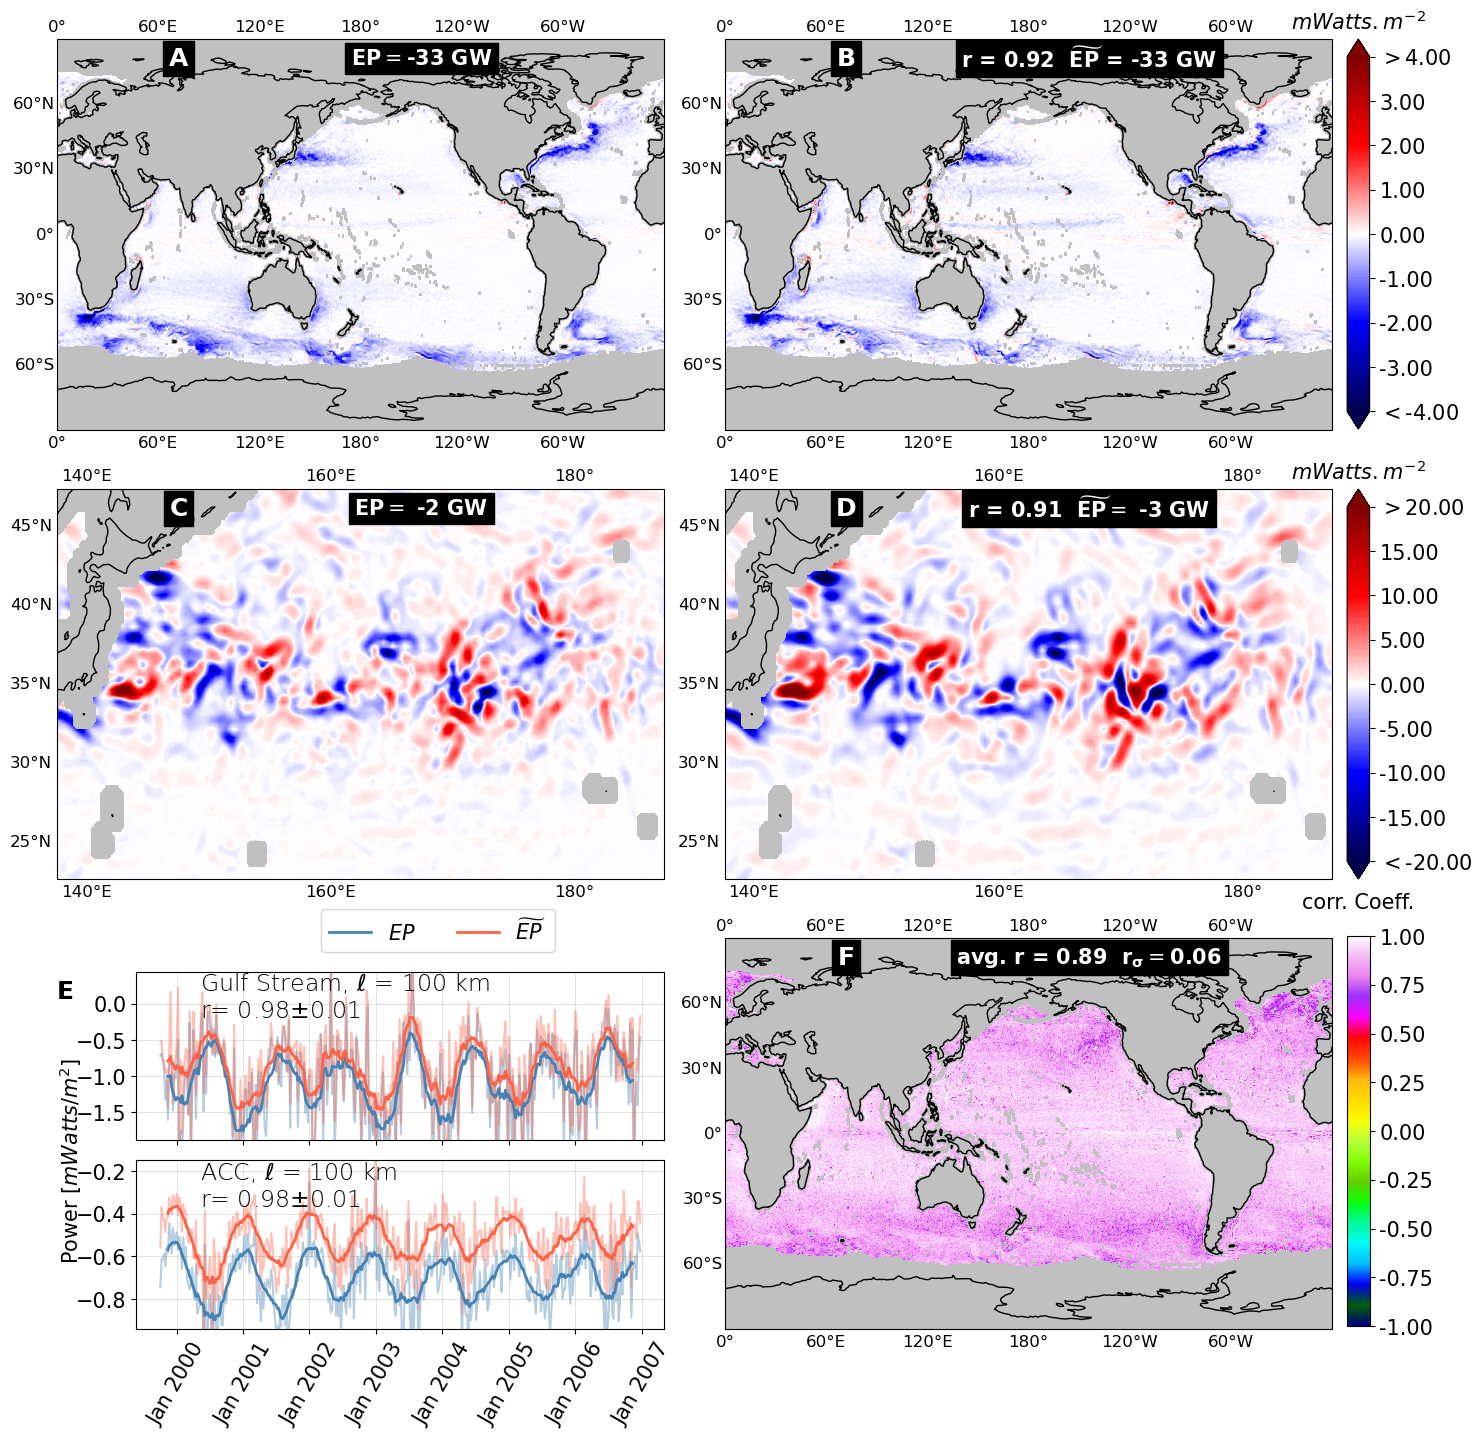

In [33]:
fig, ax = plt.subplots(nrows=3, ncols=2, 
                       subplot_kw={'projection': ccrs.PlateCarree(central_longitude=180)}, 
                       figsize=(15,15))
v = 0.005

y1, y2 = 0, 720
x1, x2 = 0, 1440
cmap = plt.get_cmap('coolwarm').copy()
locMask = KMT[y1:y2, x1:x2] < 1

####################################
pltArr1 = EPPAavg.copy()
#pltArr1 = np.roll(pltArr1,720,axis=1)
#pltArr1[locMask] = float('nan')
glbInt = np.nansum(UAREA * pltArr1) / 1e9

val = '{0:3.0f} GW'.format(glbInt)
text = r'$\mathbf{EP} = $'+ val
plot2D_clim(pltArr1*1000, lon, lat, text , 4, 
            '$mWatts.m^{-2}$', ax[0, 0], 'A',figLabelColor = 'white',
           textInFigColor = 'white', outCont = False)

########################################
pltArr2 = NLmodelavg.copy() + NLmodel2Order_avg.copy()
#pltArr2 = np.roll(pltArr2,720,axis=1)
#pltArr2[locMask] = float('nan')
x = pltArr1.flatten()
y = pltArr2.flatten()
mask = np.isnan(x)+np.isnan(y)

corr = 'r = {0:4.2f}  '.format(np.corrcoef(x[~mask],y[~mask])[0,1])

glbInt = np.nansum(UAREA * (pltArr2)) / 1e9
val = '{0:3.0f} GW'.format(glbInt)
text = corr + r'$\mathbf{\widetilde{EP}}$ = '+ val
pmesh = plot2D_clim(pltArr2*1000, lon, lat, text , 4, 
            '$mWatts.m^{-2}$', ax[0, 1], 'B',figLabelColor = 'white',
            textInFigColor = 'white', returnPlot=True, outCont = False)


#######################################
startx, starty, dx, dy = 0.91, 0.67, 0.015, 0.26
cax = fig.add_axes([startx, starty, dx, dy]) 
showCommonColorbar(pmesh, cax, 4, '$mWatts.m^{-2}$')

#######################################
n = 0
y1, y2 = 450+n, 550-n
x1, x2 = 550+n, 750-n
limRow2 = 20

pltArr3 = EPPA[y1:y2, x1:x2].copy()
locMask = pltArr3 == 0;
pltArr3[locMask] = float('nan')

glbInt = np.nansum(UAREA[y1:y2, x1:x2] * pltArr3) / 1e9
val = '{0:3.0f} GW'.format(glbInt)
text = r'$\mathbf{EP} = $'+ val
plot2D_clim(pltArr3*1000, lon[x1:x2], lat[y1:y2], text , limRow2, 
            '$mWatts.m^{-2}$', ax[1, 0], 'C',figLabelColor = 'white', 
             textInFigColor = 'white', dx = True, outCont = True)


#######################################
pltArr4 = NLmodel[y1:y2, x1:x2].copy() + NLmodel2Order[y1:y2, x1:x2].copy()
pltArr4[locMask] = float('nan')

x = pltArr3.flatten()
y = pltArr4.flatten()
mask = np.isnan(x)+np.isnan(y)
corr = 'r = {0:4.2f}  '.format(np.corrcoef(x[~mask],y[~mask])[0,1])

glbInt = np.nansum(UAREA[y1:y2, x1:x2] * pltArr4) / 1e9
val = '{0:3.0f} GW'.format(glbInt)
text = corr + '$\mathbf{\widetilde{EP}} = $'+ val


pmesh = plot2D_clim(pltArr4*1000, lon[x1:x2], lat[y1:y2], text , limRow2, 
            '$mWatts.m^{-2}$', ax[1, 1], 'D', figLabelColor = 'white',
             textInFigColor = 'white', dx = True, returnPlot=True, outCont = True)


#######################################

startx, starty, dx, dy = 0.91, 0.37, 0.015, 0.26
cax = fig.add_axes([startx, starty, dx, dy]) 
showCommonColorbar(pmesh, cax, limRow2, '$mWatts.m^{-2}$')

# corr = np.corrcoef(x[~np.isnan(x)],y[~np.isnan(y)])[0,1]
# print(corr, corr**2*100)

#######################################

ax[2,0].remove()
ax1 = fig.add_subplot(3, 2, 5)


# ax1.plot(ell, r_EPPA_NLMtot, label = 'corr. from snapshots')
# ax1.plot(ell, r_tAvg_EPPA_NLMtot, label = 'corr. from timeAvg')
# ax1.set_xlabel(r'$\ell~[km]$', fontsize = 14)
# ax1.set_ylabel('correlation coefficient', size = 14)
# ax1.tick_params(axis='both', labelsize = 12)
# ax1.legend(fontsize = 12)
# xpos, ypos = 0.15, 0.95
# ax1.text(xpos, ypos, 'E', horizontalalignment='center',
#          verticalalignment='center', transform=ax1.transAxes, 
#         fontsize = 18, weight='heavy', color='k')
# #ax[2,0].set_aspect('auto')

plot_Trend(ell, EPPA_TS*1e3, NLM_totPA_TS*1e3, [r'$EP$', r'$\widetilde{EP}$'], regions, regions[5], ax1)
divider = make_axes_locatable(ax1)
axB = divider.append_axes("top", size="100%", pad=0.2)

plot_Trend(ell, EPPA_TS*1e3, NLM_totPA_TS*1e3, [r'$EP$', r'$\widetilde{EP}$'], regions, regions[0], axB,showXticks=False)

axC = divider.append_axes("top", size="8%", pad=0.2)
handles, labels = axB.get_legend_handles_labels()
axC.legend(handles, labels, ncol = 2, loc=(0.35,0.0), fontsize=15)

axC.axis('off')

ax0 = divider.append_axes("left", size="15%", pad=0.0)

ax0.text(0.0, 1, r'Power [$mWatts/m^2$]', rotation=90, fontsize=15, verticalalignment='center', 
         transform=ax0.transAxes, rasterized=True)

xpos, ypos = 0.1, 2
ax0.text(xpos, ypos, 'E', horizontalalignment='center',
         verticalalignment='center', transform=ax0.transAxes, 
        fontsize = 18, weight='heavy', color='k')

ax0.axis('off')

#axB.set_xticklabels([])

########################################


avgCorr = np.nanmean(rNLM_tot)
stdCorr = np.nanstd(rNLM_tot)
text = 'avg. r = {0:4.2f}  '.format(avgCorr) + r'$\mathbf{r_{\sigma}} = $' +'{0:4.2f}'.format(stdCorr)

pmesh = plot2D_clim(rNLM_tot, lon, lat, text , 1, '$corr. Coeff. (r)$', ax[2,1], 'F',
            textInFigColor = 'white', cmapName='gist_ncar',
            greaterThan = False,
            lessThan = False,
            returnPlot=True, outCont=False)

startx, starty, dx, dy = 0.91, 0.072, 0.015, 0.26
cax = fig.add_axes([startx, starty, dx, dy])
showCommonColorbar(pmesh, cax, 1, 'corr. Coeff.', greaterThan = False, lessThan = False)


#########################################
plt.subplots_adjust(left=0.05, right=0.90, bottom=0.07, top = 0.93, wspace=0.1, hspace=0.15)
plt.savefig('EPandNLMComp.pdf', format='pdf', dpi=70)
#print(pltArr3.shape, pltArr4.shape)

In [16]:
fldLoc = '/scratch/srai6/EddyKillingPaper3/CESM/'
timeSpaceFlat = 'timeSpaceFlattenCorr.nc'
corr_2D = 'Corr2D_allEll.nc'
ds1 = Dataset(fldLoc + timeSpaceFlat)
ds2 = Dataset(fldLoc + corr_2D)

ell2 = np.array(ds1.variables['ell'])
regions = np.array(ds1.variables['region'])
corr_EPPA_NLMtot = np.array(ds1.variables['corr_EPPA_NLMtot'])
corr_EPPA_NLMrot = np.array(ds1.variables['corr_EPPA_NLMrot'])
corr_EPPA_NLMstr = np.array(ds1.variables['corr_EPPA_NLMstr'])
corr_tAvg_EPPA_NLMtot = np.array(ds1.variables['corr_tAvg_EPPA_NLMtot'])
corr_tAvg_EPPA_NLMrot = np.array(ds1.variables['corr_tAvg_EPPA_NLMrot'])
corr_tAvg_EPPA_NLMst = np.array(ds1.variables['corr_tAvg_EPPA_NLMstr'])


ds_corr_all = Dataset("/scratch/srai6/EddyKillingPaper3/QuikSCAT/timeSpaceFlattenCorr.nc")
ds_corr_2D = Dataset("/scratch/srai6/EddyKillingPaper3/QuikSCAT/Corr2D_allEll.nc")

ell = np.array(ds_corr_2D.variables['ell'])
ellIDX = np.where(ell == 100)[0][0]

region = np.array(ds_corr_all.variables['region'])
regionIDX = np.where(region == 'Global')[0][0]

rNLM_tot = np.array(ds_corr_2D.variables['rNLM_tot'][ellIDX,:,:])
rNLM_tot[landMask] = float('nan')
r_EPPA_NLMtot = np.array(ds_corr_all.variables['corr_EPPA_NLMtot'][:,:]) 
r_tAvg_EPPA_NLMtot = np.array(ds_corr_all.variables['corr_tAvg_EPPA_NLMtot'][:,:]) # (ell, region)

print(regions)
print(region)

regionNames = {'Gulf' :'Gulf\nStream',
               'Kuroshio' : 'Kuroshio\nExtension',
               'BrazilACC' : 'Brazil\nMalvinas',
               'Agulhas' : 'Agulhas',
               'SouthernOcean' : 'Southern\nOcean',
               'ACC' : 'ACC',
               'Equator' : 'Equator',
               'Global' : 'Global',
               'HighEKE' : 'High EKE'}

FileNotFoundError: [Errno 2] No such file or directory: b'/scratch/srai6/EddyKillingPaper3/QuikSCAT/timeSpaceFlattenCorr.nc'

In [ ]:
fig, ax = plt.subplots(nrows=4, ncols=2, sharex=True, sharey=True, figsize=(10, 10))

for i in range(8):
    ii = i//2
    jj = i%2
    ax[ii, jj].plot(ell, r_EPPA_NLMtot[:, i], label = 'AVISO\nwith QuikSCAT')
    ax[ii, jj].plot(ell2, corr_EPPA_NLMtot[:,i], label = 'CESM')
    if ii == 3:
        ax[ii, jj].set_xlabel(r'$\ell~[km]$', fontsize = 15)
    if jj == 0:
        ax[ii, jj].set_ylabel('corr. coeff.' , size = 15)
    ax[ii, jj].tick_params(axis='both', labelsize = 12)
    ax[ii, jj].legend(fontsize = 12)
    xpos, ypos = 0.4, 0.85
    ax[ii,jj].text(xpos, ypos, regionNames[regions[i]] , horizontalalignment='center',
             verticalalignment='center', transform=ax[ii,jj].transAxes, 
            fontsize = 15, color='k')
    ax[ii,jj].grid(True)
    
plt.subplots_adjust(left=0.075, right=0.90, bottom=0.07, top = 0.93, wspace=0.05, hspace=0.05)
plt.savefig('CorrWithEll.pdf', format='pdf', dpi=70)


In [ ]:
regionNames[region[0]]

In [ ]:
i = 0
fig = plt.figure(figsize=(6,4))
ax1 = fig.add_subplot(1,1,1)
ax1.plot(ell, r_EPPA_NLMtot[:, i], label = 'AVISO and QuikSCAT')
#ax1.plot(ell, r_tAvg_EPPA_NLMtot, label = 'AVISO and QuikSCAT timeAvg')

ax1.plot(ell2, corr_EPPA_NLMtot[:,i], label = 'CESM')


ax1.set_xlabel(r'$\ell~[km]$', fontsize = 14)
ax1.set_ylabel('correlation coefficient', size = 14)
ax1.tick_params(axis='both', labelsize = 12)
ax1.legend(fontsize = 12)
xpos, ypos = 0.3, 0.90
ax1.text(xpos, ypos, 'Gulf Stream' , horizontalalignment='center',
         verticalalignment='center', transform=ax1.transAxes, 
        fontsize = 15, color='k')

plt.savefig('CorrWithEll.pdf', dpi=70)

In [ ]:
def getCorrArray(ell):
    origFile = '/scratch/srai6/EddyKillingPaper3/QuikSCAT/collection_ell_{0:d}.nc'.format(ell)
    modelFile = '/scratch/srai6/EddyKillingPaper3/QuikSCAT/NLmodelEP_{0:d}km.nc'.format(ell)

    ds_orig = Dataset(origFile)
    ds_modl = Dataset(modelFile)
    
    EPPA = np.array(ds_orig.variables['EPPA'])
    NLmodel = np.array(ds_modl.variables['NLmodel_EPCg'])
    
    EPPA[landMaskWtimeAx] = float('nan')
    NLmodel[landMaskWtimeAx] = float('nan')
    
    #EPPA[:,mask_tropics,:] = float('nan')
    #NLmodel[:,mask_tropics,:] = float('nan')
    
    time_meanEPPA = np.nanmean(EPPA, axis =0)
    time_meanNLmodel = np.nanmean(NLmodel, axis =0)
    
    stdDev_EPPA = np.nanstd(EPPA, axis = 0)
    stdDev_NLmodel = np.nanstd(NLmodel, axis = 0)
    
    fluc_EPPA = EPPA - time_meanEPPA
    fluc_NLmodel = NLmodel - time_meanNLmodel
    
    z_score_EPPA = 1/stdDev_EPPA * fluc_EPPA
    z_score_NLmodel = 1/stdDev_NLmodel * fluc_NLmodel
    
    n = EPPA.shape[0]
    
    r = np.sum((z_score_EPPA * z_score_NLmodel), axis = 0) * 1/(n-1)
    
    return r

In [ ]:
def plot2D_clim(plotMat, X, Y, 
                textInFig, 
                lim, 
                cbUnits, 
                ax, figLabel, figLabelColor = 'white', 
                textInFigColor = 'white',
                cmapName='seismic',
                greaterThan = 'True',
                lessThan = 'True'):
    minval = np.nanmin(plotMat)
    maxval = np.nanmax(plotMat)

    print(minval)
    print(maxval)

    if abs(minval) < maxval:
        val = abs(minval) * 0.1
    else:
        val = abs(maxval) * 0.1
        
    cmap = plt.get_cmap(cmapName).copy()
    cmap.set_bad('black', 1.)
    pmesh = ax.pcolormesh(X, Y, plotMat, cmap=cmap, rasterized=True, vmin = -lim, vmax = lim)
    
    ax.tick_params(which='both', size=4, labelsize=15)
    ax.set_xlabel(r'$^\circ$E', fontsize=15)
    ax.set_ylabel(r'$^\circ$N', fontsize=15, rotation=0)
    ax.xaxis.set_label_coords(1.02,-0.01)
    ax.yaxis.set_label_coords(-0.01,1.02)
    
    #setting colorbar ticks
    exp = int(np.log10(lim))
    if exp < 0: exp-=1
    # if exp > 0: exp+=1
#     print('lim=', lim)
#     print('ext=', exp)
    
    dlim = 2*lim/8
    tickList = list(np.arange(-lim, lim+dlim, dlim))
    cb = plt.colorbar(pmesh, ax=ax, ticks=tickList)
    
    strTickList = ['{0:04.2f}'.format(x) for x in tickList]
    
    if greaterThan:
        strTickList[0] = '$<$' + strTickList[0]
    if lessThan:
        strTickList[-1] = '$>$' + strTickList[-1]
        
    cb.ax.set_yticklabels(strTickList)
    
    #cbTitle = r'({0})$\times 10^{1}$'.format(cbUnits, '{'+str(exp)+'}' )
    
    cbTitle = r'{0}'.format(cbUnits)
    
    cb.ax.set_title(cbTitle, size=15)
    cb.ax.tick_params(labelsize=15)
    
    xpos, ypos = 0.60, 0.95
    ax.text(xpos, ypos, textInFig, horizontalalignment='center',
     verticalalignment='center', transform=ax.transAxes, fontsize = 15, weight='heavy', color=textInFigColor)
    
    xpos, ypos = 0.20, 0.95
    ax.text(xpos, ypos, figLabel, horizontalalignment='center',
     verticalalignment='center', transform=ax.transAxes, fontsize = 18, weight='heavy', color=figLabelColor)

#     plt.tight_layout()
#     #plt.title(Title)
#     #plt.show()
#     fig.savefig(Title + '.pdf', dpi=300, format='pdf', bbox_inches='tight')
#     fig.savefig(Title + '.jpg', dpi=300, format='jpg', bbox_inches='tight')

In [ ]:
y1, y2 = 0, 720
x1, x2 = 0, 1440
i = 9

fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(15,10))
v = 0.005

cmap = plt.get_cmap('seismic').copy()
cmap.set_bad('black', 1.)
locMask = KMT[y1:y2, x1:x2] < 1

pltArr1 = EPPAavg[y1:y2, x1:x2].copy()
pltArr1[locMask] = float('nan')
glbInt = np.nansum(UAREA * EPPAavg) / 1e9

val = '{0:3.0f} GW'.format(glbInt)
text = r'$\mathbf{EP} = $'+ val
plot2D_clim(pltArr1*1000, lon[x1:x2], lat[y1:y2], text , 4, '$mWatts.m^{-2}$', ax[0, 0], 'A')


pltArr2 = NLmodelavg[y1:y2, x1:x2].copy()
pltArr2[locMask] = float('nan')
x = pltArr1.flatten()
y = pltArr2.flatten()

corr = 'r = {0:4.2f}  '.format(np.corrcoef(x[~np.isnan(x)],y[~np.isnan(y)])[0,1])


glbInt = np.nansum(UAREA * NLmodelavg) / 1e9
val = '{0:3.0f} GW'.format(glbInt)
text = corr + r'$\mathbf{\widetilde{EP}}$ = '+ val
plot2D_clim(pltArr2*1000, lon[x1:x2], lat[y1:y2], text , 4, '$mWatts.m^{-2}$', ax[0, 1], 'B')



y1, y2 = 450, 550
x1, x2 = 550, 750

day = 10

pltArr3 = EPPA[day, y1:y2, x1:x2].copy()
locMask = pltArr3 == 0;
pltArr3[locMask] = float('nan')

glbInt = np.nansum(UAREA[y1:y2, x1:x2] * EPPA[day, y1:y2, x1:x2]) / 1e9
val = '{0:3.0f} GW'.format(glbInt)
text = r'$\mathbf{EP} = $'+ val
plot2D_clim(pltArr3*1000, lon[x1:x2], lat[y1:y2], text , 10, '$mWatts.m^{-2}$', ax[1, 0], 'C', textInFigColor = 'k')

pltArr4 = NLmodel[day, y1:y2, x1:x2].copy()
pltArr4[locMask] = float('nan')

x = pltArr3.flatten()
y = pltArr4.flatten()
corr = 'r = {0:4.2f}  '.format(np.corrcoef(x[~np.isnan(x)],y[~np.isnan(y)])[0,1])

glbInt = np.nansum(UAREA[y1:y2, x1:x2] * NLmodel[day, y1:y2, x1:x2]) / 1e9
val = '{0:3.0f} GW'.format(glbInt)
text = corr + '$\mathbf{\widetilde{EP}} = $'+ val


plot2D_clim(pltArr4*1000, lon[x1:x2], lat[y1:y2], text , 10, '$mWatts.m^{-2}$', ax[1, 1], 'D', textInFigColor = 'k')



corr = np.corrcoef(x[~np.isnan(x)],y[~np.isnan(y)])[0,1]
print(corr, corr**2*100)
plt.subplots_adjust(left=0.05, right=0.95, bottom=0.07, top = 0.93, wspace=0.1)
plt.savefig('timeAvgEPandNLMComp.pdf', format='pdf', dpi=70)
print(pltArr3.shape, pltArr4.shape)

In [ ]:
r = rNLM_tot #getCorrArray(100)

In [ ]:
avgCorr = np.nanmean(r)
stdCorr = np.nanstd(r)
text = 'avg. r = {0:4.2f}  '.format(avgCorr) + r'$\mathbf{r_{\sigma}} = $' +'{0:4.2f}'.format(stdCorr)
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,6))
plot2D_clim(r, lon, lat, text , 1, '$corr. Coeff. (r)$', ax, '',
            textInFigColor = 'white', cmapName='gist_ncar',
            greaterThan = False,
            lessThan = False)
plt.subplots_adjust(left=0.05, right=1, bottom=0.07, top = 0.93)
plt.savefig('corrArray.pdf', format='pdf', dpi=70)

In [ ]:
# y1, y2 = 500, 600
# x1, x2 = 500, 700

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16,7), sharex = True)
v = 0.01
pmesh1 = ax[0].pcolormesh(lon[x1:x2], lat[y1:y2], EPPA[i, y1:y2, x1:x2], #)
                          vmin= -v, vmax = v, 
                          cmap='seismic')
ax[0].set_title(r'$EP$')
cbar1 = plt.colorbar(pmesh1, ax = ax[0])
pmesh2 = ax[1].pcolormesh(lon[x1:x2], lat[y1:y2], NLmodel[i, y1:y2, x1:x2], #)
                          vmin= -v, vmax = v, 
                          cmap='seismic')
ax[1].set_title('Model')
cbar2 = plt.colorbar(pmesh2, ax = ax[1])

x = EPPA[i, y1:y2, x1:x2].flatten()
y = NLmodel[i, y1:y2, x1:x2].flatten()
corr = np.corrcoef(x[~np.isnan(x)],y[~np.isnan(y)])[0,1]
print(corr, corr**2*100)
print(x1, x2, y1, y2)
print(i)

In [ ]:
# y1, y2 = 500, 600
# x1, x2 = 500, 700

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16,7), sharex = True)
v = 0.01
pmesh1 = ax[0].pcolormesh(lon[x1:x2], lat[y1:y2], EPPAavg[y1:y2, x1:x2], #)
                          vmin= -v, vmax = v, 
                          cmap='seismic')
ax[0].set_title(r'$EP$')
cbar1 = plt.colorbar(pmesh1, ax = ax[0])
pmesh2 = ax[1].pcolormesh(lon[x1:x2], lat[y1:y2], NLmodelavg[y1:y2, x1:x2], #)
                          vmin= -v, vmax = v, 
                          cmap='seismic')
ax[1].set_title('Model')
cbar2 = plt.colorbar(pmesh2, ax = ax[1])

x=EPPAavg[y1:y2, x1:x2].flatten()
y=NLmodelavg[y1:y2, x1:x2].flatten()
corr = np.corrcoef(x[~np.isnan(x)],y[~np.isnan(y)])[0,1]
print(corr)

In [ ]:
ellList = np.arange(60,450, 20)
ellList = np.append(np.array([50]), ellList, axis=0)
ellList = np.append(ellList, np.arange(500, 1050, 100), axis=0)

corrList = []
corrTimeAvgList = []

EPCg_inGW = []
intgModl_inGW = []
for ell in ellList:
    origFile = '/scratch/srai6/EddyKillingPaper3/QuikSCAT/collection_ell_{0:d}.nc'.format(ell)
    modelFile = '/scratch/srai6/EddyKillingPaper3/QuikSCAT/NLmodelEP_{0:d}km.nc'.format(ell)

    ds_orig = Dataset(origFile)
    ds_modl = Dataset(modelFile)
    
    EPPA = np.array(ds_orig.variables['EPPA'])
    NLmodel = np.array(ds_modl.variables['NLmodel_EPCg'])
    
    EPPA[landMaskWtimeAx] = float('nan')
    NLmodel[landMaskWtimeAx] = float('nan')
    
    #EPPA[:,mask_tropics,:] = float('nan')
    #NLmodel[:,mask_tropics,:] = float('nan')
    
    EPPAavg = np.mean(EPPA, axis = 0)
    NLmodelavg = np.mean(NLmodel, axis=0)
    
    EPCg_inGW.append(np.nansum(EPPA*UAREAwTax)/(1e9 *378))
    intgModl_inGW.append(np.nansum(NLmodel*UAREAwTax)/(1e9 * 378))
    
    nanMask = np.isnan(EPPA)
    nanMask = np.logical_or(nanMask, np.isnan(NLmodel))  
    corr = np.corrcoef(x=EPPA[~nanMask].flatten(), y=NLmodel[~nanMask].flatten())[0,1]
    corrList.append(corr)
    
    nanMask2 = np.isnan(EPPAavg)
    nanMask2 = np.logical_or(nanMask2, np.isnan(NLmodelavg))
    corr2 = np.corrcoef(x=EPPAavg[~nanMask2].flatten(), y=NLmodelavg[~nanMask2].flatten())[0,1]
    corrTimeAvgList.append(corr2)
    
    print(ell, corr, corr2)

In [ ]:
fig, ax = plt.subplots(figsize = (4,3))
ax.plot(ellList, corrList, label = 'corr. from snapshots')
ax.plot(ellList, corrTimeAvgList, label = 'corr. from timeAvg')
ax.set_xlabel(r'$\ell~[km]$', fontsize = 12)
ax.set_ylabel('correlation coefficient', size = 12)
ax.tick_params(axis='both', labelsize=12)
plt.legend()
plt.subplots_adjust(left=0.05, right=1, bottom=0.07, top = 0.93)
plt.savefig('corrWithEll.pdf', format='pdf', dpi=70)

In [ ]:
avgCorr = np.nanmean(r)
stdCorr = np.nanstd(r)
text = 'avg. r = {0:4.2f}  '.format(avgCorr) + r'$\mathbf{r_{\sigma}} = $' +'{0:4.2f}'.format(stdCorr)
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15,6), gridspec_kw={'width_ratios': [2, 1]})

plot2D_clim(r, lon, lat, text , 1, '$corr. Coeff. (r)$', ax[0], 'A',
            textInFigColor = 'white', cmapName='gist_ncar',
            greaterThan = False,
            lessThan = False)

ax[1].plot(ellList, corrList, label = 'corr. from snapshots')
ax[1].plot(ellList, corrTimeAvgList, label = 'corr. from timeAvg')
ax[1].set_xlabel(r'$\ell~[km]$', fontsize = 15)
ax[1].set_ylabel('correlation coefficient', size = 15)
ax[1].tick_params(axis='both', labelsize=15)
ax[1].legend(fontsize = 15)
xpos, ypos = 0.15, 0.95
ax[1].text(xpos, ypos, 'B', horizontalalignment='center',
         verticalalignment='center', transform=ax[1].transAxes, 
        fontsize = 18, weight='heavy', color='k')

plt.subplots_adjust(left=0.05, right=0.95, bottom=0.1, top = 0.93, wspace = 0.1)
plt.savefig('corrArrayAndWithEll.pdf', format='pdf', dpi=70)

In [ ]:
plt.plot(ellList, np.array(EPCg_inGW), label = r'$EP$')
plt.plot(ellList, np.array(intgModl_inGW), label = r'$NLM$')
plt.xlabel(r'$\ell~[km]$')
plt.ylabel(r'$EP~[GW]$')
plt.legend()

In [ ]:
def getCorrArray(ell):
    origFile = '/scratch/srai6/EddyKillingPaper3/QuikSCAT/collection_ell_{0:d}.nc'.format(ell)
    modelFile = '/scratch/srai6/EddyKillingPaper3/QuikSCAT/NLmodelEP_{0:d}km.nc'.format(ell)

    ds_orig = Dataset(origFile)
    ds_modl = Dataset(modelFile)
    
    EPPA = np.array(ds_orig.variables['EPPA'])
    NLmodel = np.array(ds_modl.variables['NLmodel_EPCg'])
    
    EPPA[landMaskWtimeAx] = float('nan')
    NLmodel[landMaskWtimeAx] = float('nan')
    
    #EPPA[:,mask_tropics,:] = float('nan')
    #NLmodel[:,mask_tropics,:] = float('nan')
    
    time_meanEPPA = np.nanmean(EPPA, axis =0)
    time_meanNLmodel = np.nanmean(NLmodel, axis =0)
    
    stdDev_EPPA = np.nanstd(EPPA, axis = 0)
    stdDev_NLmodel = np.nanstd(NLmodel, axis = 0)
    
    fluc_EPPA = EPPA - time_meanEPPA
    fluc_NLmodel = NLmodel - time_meanNLmodel
    
    z_score_EPPA = 1/stdDev_EPPA * fluc_EPPA
    z_score_NLmodel = 1/stdDev_NLmodel * fluc_NLmodel
    
    n = EPPA.shape[0]
    
    r = np.sum((z_score_EPPA * z_score_NLmodel), axis = 0) * 1/(n-1)
    
    return r

In [ ]:
r = getCorrArray(100)

In [ ]:
r.shape

In [ ]:
import matplotlib.colors as colors
import matplotlib.cbook as cbook
from matplotlib import cm

plt.figure(figsize = (14, 8))
plt.pcolormesh(r, cmap ='gist_ncar')# norm=colors.CenteredNorm(), cmap = 'seismic')
plt.colorbar()

In [ ]:
r2 = getCorrArray(220)

In [ ]:
plt.figure(figsize = (14, 8))
plt.pcolormesh(r2, cmap ='gist_ncar')# norm=colors.CenteredNorm(), cmap = 'seismic')
plt.colorbar()

In [ ]:
ellList = np.arange(60,450, 20)
ellList = np.append(np.array([50]), ellList, axis=0)
ellList = np.append(ellList, np.arange(500, 1050, 100), axis=0)

corrList2 = []
corrTimeAvgList2 = []

EPCg_inGW2 = []
intgModl_inGW2 = []
for ell in ellList:
    origFile = '/scratch/srai6/EddyKillingPaper3/QuikSCAT_100km/collection_ell_{0:d}.nc'.format(ell)
    modelFile = '/scratch/srai6/EddyKillingPaper3/QuikSCAT_100km/NLmodelEP_{0:d}km.nc'.format(ell)

    ds_orig = Dataset(origFile)
    ds_modl = Dataset(modelFile)
    
    EPPA = np.array(ds_orig.variables['EPPA'])
    NLmodel = np.array(ds_modl.variables['NLmodel_EPCg'])
    
    EPPA[landMaskWtimeAx] = float('nan')
    NLmodel[landMaskWtimeAx] = float('nan')
    
    #EPPA[:,mask_tropics,:] = float('nan')
    #NLmodel[:,mask_tropics,:] = float('nan')
    
    EPPAavg = np.mean(EPPA, axis = 0)
    NLmodelavg = np.mean(NLmodel, axis=0)
    
    EPCg_inGW2.append(np.nansum(EPPA*UAREAwTax)/(1e9 *378))
    intgModl_inGW2.append(np.nansum(NLmodel*UAREAwTax)/(1e9 * 378))
    
    nanMask = np.isnan(EPPA)
    nanMask = np.logical_or(nanMask, np.isnan(NLmodel))  
    corr = np.corrcoef(x=EPPA[~nanMask].flatten(), y=NLmodel[~nanMask].flatten())[0,1]
    corrList2.append(corr)
    
    nanMask2 = np.isnan(EPPAavg)
    nanMask2 = np.logical_or(nanMask2, np.isnan(NLmodelavg))
    corr2 = np.corrcoef(x=EPPAavg[~nanMask2].flatten(), y=NLmodelavg[~nanMask2].flatten())[0,1]
    corrTimeAvgList2.append(corr2)
    
    print(ell, corr, corr2)

In [ ]:
fig, ax = plt.subplots(figsize = (4,3))
ax.plot(ellList, corrList, label = 'corr. from snapshots')
ax.plot(ellList, corrTimeAvgList, label = 'corr. from timeAvg')
ax.set_xlabel(r'$\ell~[km]$', fontsize = 12)
ax.set_ylabel('correlation coefficient', size = 12)
ax.tick_params(axis='both', labelsize=12)
plt.legend()
plt.subplots_adjust(left=0.05, right=1, bottom=0.07, top = 0.93)
plt.savefig('corrWithEll_100km.pdf', format='pdf', dpi=70)

In [ ]:
ellList = np.arange(60,450, 20)
ellList = np.append(np.array([50]), ellList, axis=0)
ellList = np.append(ellList, np.arange(500, 1050, 100), axis=0)

corrList = []
corrTimeAvgList = []

EPCg_inGW = []
intgModl_inGW = []
intgModlrot_inGW = []
intgModlstr_inGW = []

for ell in ellList:
    origFile = '/scratch/srai6/EddyKillingPaper3/QuikSCAT/collection_ell_{0:d}.nc'.format(ell)
    modelFile = '/scratch/srai6/EddyKillingPaper3/QuikSCAT/NLmodelEP_{0:d}km.nc'.format(ell)

    ds_orig = Dataset(origFile)
    ds_modl = Dataset(modelFile)
    
    EPPA = np.array(ds_orig.variables['EPPA'])
    NLmodel = np.array(ds_modl.variables['NLmodel_EPCg'])
    NLmodel_rot = np.array(ds_modl.variables['NLmodel_EPCg_rot'])
    NLmodel_strain = np.array(ds_modl.variables['NLmodel_EPCg_strain'])
    
    EPCg_inGW.append(np.nansum(EPPA*UAREAwTax)/(1e9 *378))
    intgModl_inGW.append(np.nansum(NLmodel*UAREAwTax)/(1e9 * 378))
    intgModlrot_inGW.append(np.nansum(NLmodel_rot*UAREAwTax)/(1e9 * 378))
    intgModlstr_inGW.append(np.nansum(NLmodel_strain*UAREAwTax)/(1e9 * 378))
    

In [ ]:
fig, ax = plt.subplots(nrows =1, ncols =1, sharey = True)
n = 12
ax.plot(np.insert( ellList[0:n], 0, 0), np.insert(EPCg_inGW[0:n], 0, 0), label = r'$EP$', linewidth = 1 )
ax.plot(np.insert( ellList[0:n], 0, 0), np.insert(intgModl_inGW[0:n], 0, 0) , label = r'$NLM$', linewidth = 1)
ax.plot(np.insert( ellList[0:n], 0, 0), np.insert(intgModlrot_inGW[0:n], 0, 0), label = r'$NLM^{skw}$', marker='o', linewidth = 2 )
ax.plot(np.insert( ellList[0:n], 0, 0), np.insert(intgModlstr_inGW[0:n], 0, 0), label = r'$NLM^{sym}$', marker='x' , linewidth = 1 )
plt.legend()

In [ ]:
a = np.array([[1, 1], [2, 2], [3, 3]])
print(np.shape(a))
b = np.insert(a, 0, 5)
print(b, np.shape(b))